## SVM算法

#### 使用的数据集来自于： 
https://github.com/cystanford/breast_cancer_data/blob/master/data.csv


In [2]:
from sklearn import svm

#分类： svm.SVC  svm.LinearSVC 只针对线性核函数
#回归：svm.SVR svm.LinearSVR

####  核函数介绍
- kernel：选择的核函数
    - linear：线性核函数，是在数据线性可分的情况下使用的， 运算速度快，效果好。不足在于它不能处理线性不可分的数据。
    - poly：多项式核函数可以将数据从低维空间映射到高维空间，但参数比较多，计算量大。
    - rbf：高斯核函数（默认）同样可以将样本映射到高维空间， 但相比于多项式核函数来说所需的参数比较少，通常性能不错，所以是默认使用的核函数。
    - sigmoid：sigmoid 核函数，当选用 sigmoid 核函数时，SVM 实现的是多层神经网络。
- C：代表目标函数的惩罚系数，默认为1.0，也就是正则化，也就是软间隔的调整
    - 当C越大时，分类器的准确性越高，所以容错率越低，泛化能力就变差。
    - 当C越小时，分类器的准确性降低，但容错率增大，泛化能力越强
- gamma：和函数系数，默认为样本特征的倒数。1/n_features


In [3]:
svm.SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale'
)

SVC()

##### 接下来利用SVM进行乳腺癌检测

In [4]:
from sklearn import svm
import numpy as np
import pandas as pd


In [5]:
# 读入数据
"""
- 569条样本数据
- 字段：32个
- 目标(标签)：diagnosis
    - B良性-->0
    - M恶性-->1
- 特征：除了标签以外的字段
    - id对分类毫无意义：去除
    - 其它30个字段：mean,se,worst 分为三组

"""
df = pd.read_csv('data.csv') 
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# B映射为0 M映射为1
df["diagnosis"] = df["diagnosis"].map({"M":1,"B":0}) 
# id无用，删除
df = df.drop("id", axis = 1)

In [10]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
"""
特征字段分为三组
- _mean(特征均值)为一组
- _se（特征标准差）为一组
- _worst（特征最差值）为一组
pandas.DataFrame.loc[] 通过标签或布尔数组访问一组行和列
pandas.Index.tolist()
"""
f_mean = df.loc[:,"radius_mean":"fractal_dimension_mean"].columns.tolist()
f_se = df.loc[:,"radius_se":"fractal_dimension_se"].columns.tolist()
f_worst = df.loc[:,"radius_worst":"fractal_dimension_worst"].columns.tolist()
print(f_mean,f_se,f_worst,sep="\n")

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<Axes: >

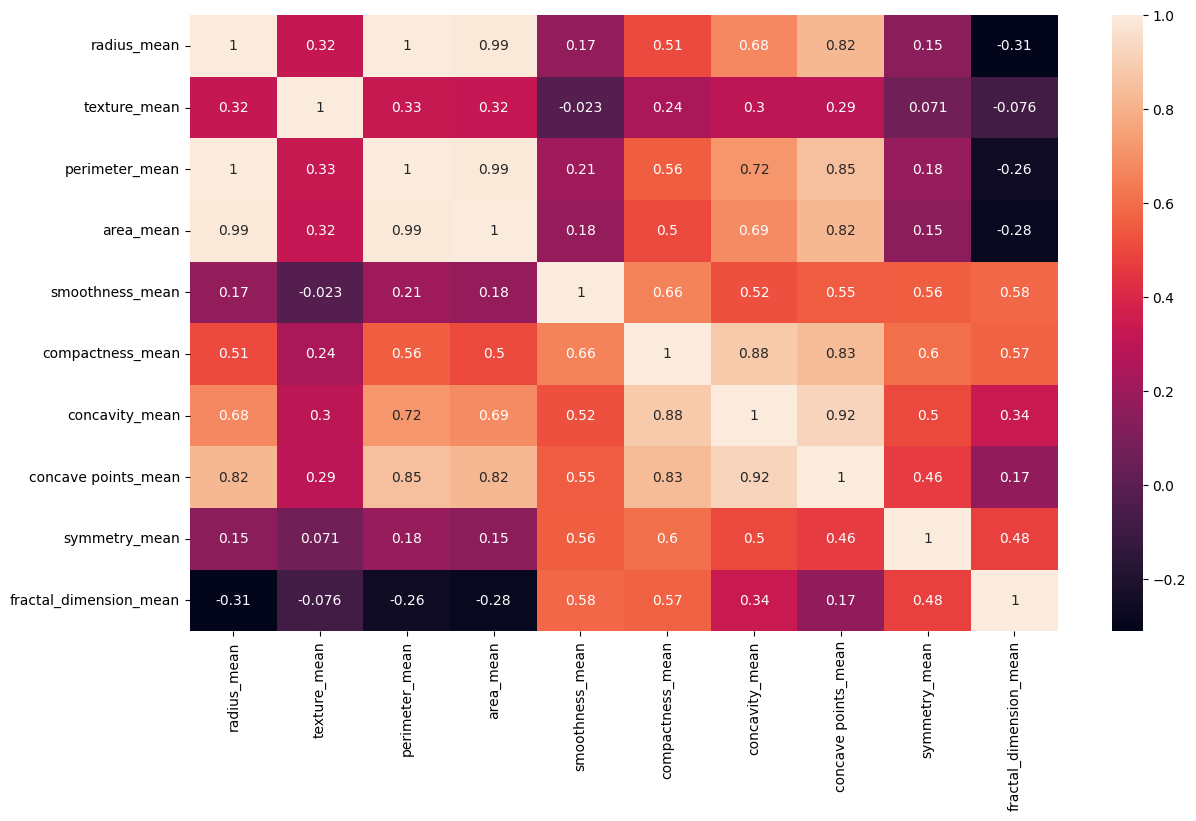

In [40]:
## 特征筛选
"""
特征筛选原因：
30个特征很容易过拟合
训练时间消耗过长
"""
import seaborn as sns
from matplotlib import pyplot as plt 

"""
筛选特征-->降维
- 选择mean这组特征。在mean这组特征里面每个特征都一定需要嘛？
- 观察mean这组特征里面两两特征之间的相关性
    - 相关程度非常高：选择其中一个作为代表即可
"""

mean_corr = df[f_mean].corr()
"""
来进行相关性的可视化
- 热力图：颜色越浅说明相关程度越大
    - annot=True-->显示每个方格的数据
"""
plt.figure(figsize=(14,8))
sns.heatmap(mean_corr,annot=True)

In [42]:
"""
radius perimeter area 之间的相关程度很高。 选取任意一个代表,
compatctness,concavity,concave_points 之间的相关程度很高。选取任意一个代表
"""
# 注意 在这个里面里面我们只拿了平均值的特征组，并且去掉一些相关性很大的特征，选择了代表性特征，如下
f_mean = ['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean']



<Axes: >

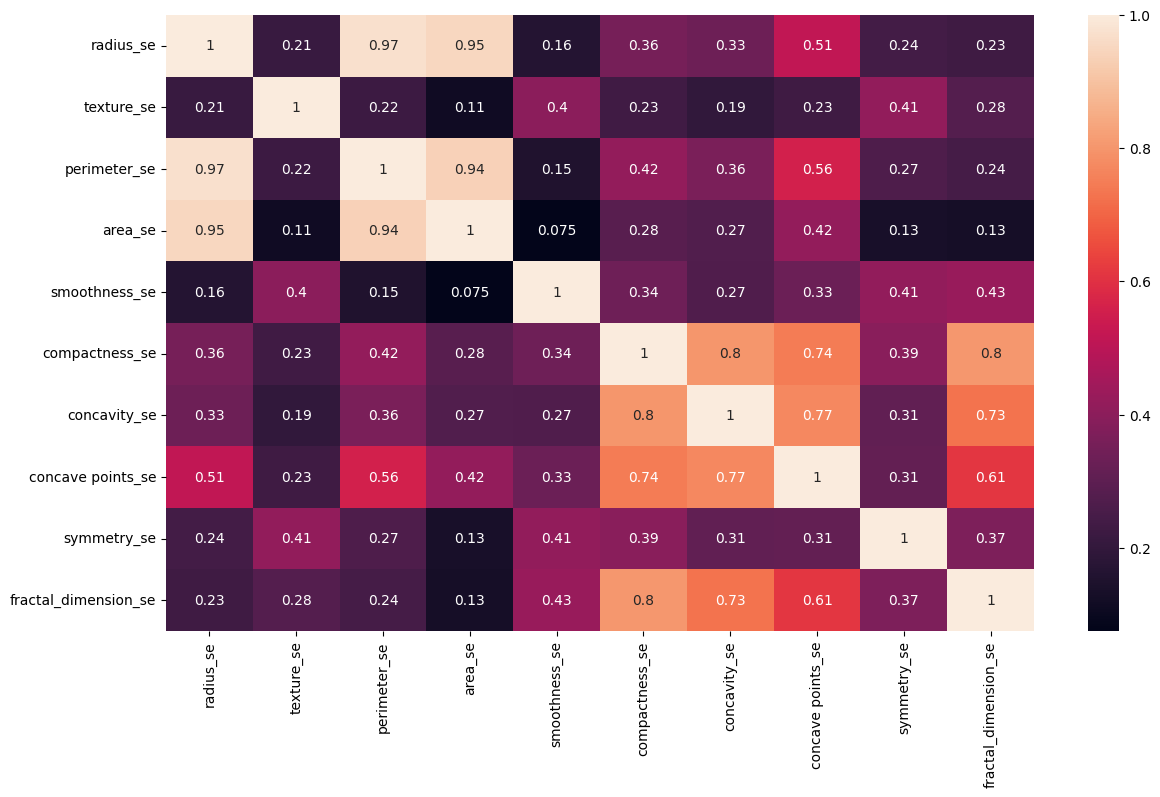

In [43]:
se_corr = df[f_se].corr()
plt.figure(figsize=(14,8))
sns.heatmap(se_corr,annot=True)

<Axes: >

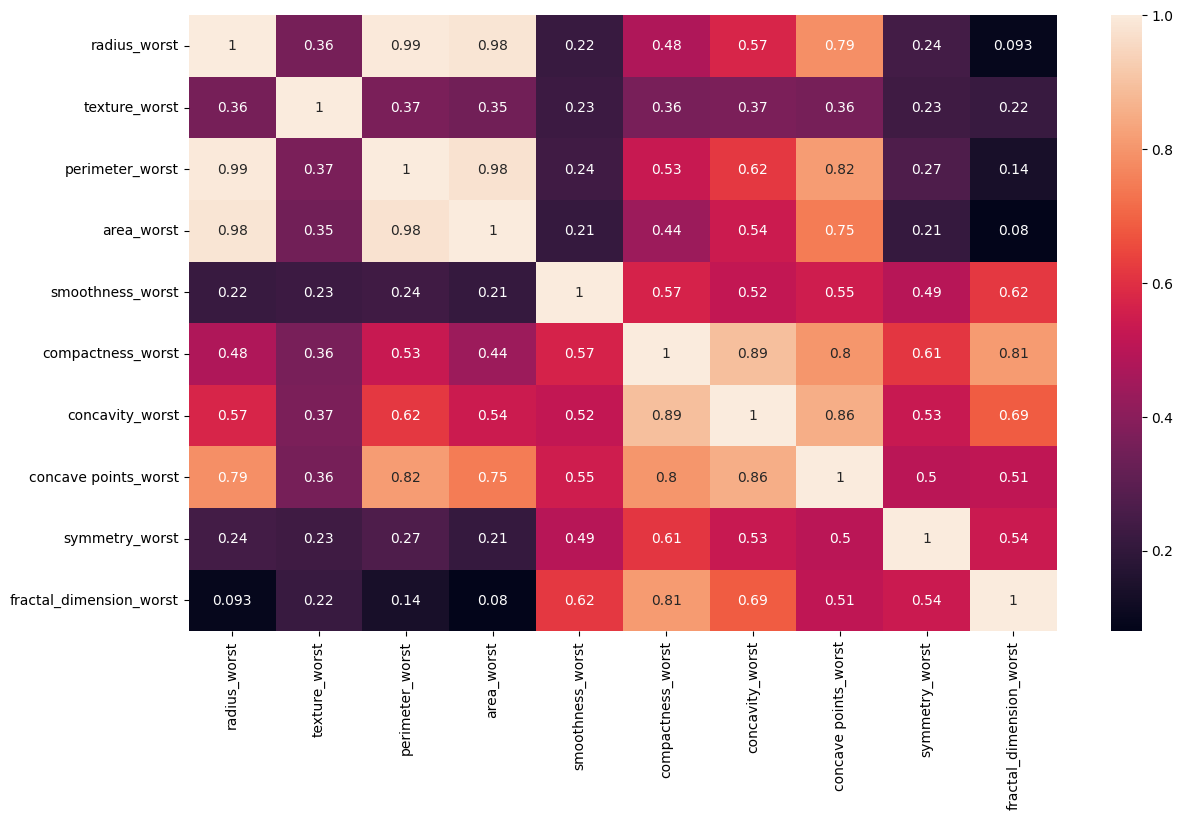

In [44]:
worst_corr = df[f_worst].corr()
plt.figure(figsize=(14,8))
sns.heatmap(worst_corr,annot=True)

In [45]:
"""
同理去掉另外两组的特征
"""

f_se = [ 'radius_se', 
        'texture_se', 
        'smoothness_se', 
        'compactness_se',
        'concavity_se', 
        'concave points_se',
        'symmetry_se', 
        'fractal_dimension_se',
]
f_worst = ['radius_worst',
           'texture_worst',           
           'smoothness_worst',
           'compactness_worst',
           'concavity_worst',
           'symmetry_worst',
           'fractal_dimension_worst']


In [46]:
## 数据分割

from sklearn.model_selection import train_test_split
# 构建训练集 测试集 特征数组(这里只拿均值来做训练)
train, test = train_test_split(df, test_size=0.3)
train_X = train[f_mean]
test_X = test[f_mean]
train_Y = train["diagnosis"]
test_Y = test["diagnosis"]

# 数据归一化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.fit_transform(test_X)


In [52]:
## 模型训练及预测
model = svm.SVC()
model.fit(train_X, train_Y)
predictions = model.predict(test_X)
predictions

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
"""
7 模型评价
"""
from sklearn.metrics import accuracy_score
accuracy_score(test_Y, predictions)

0.9532163742690059